In [14]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


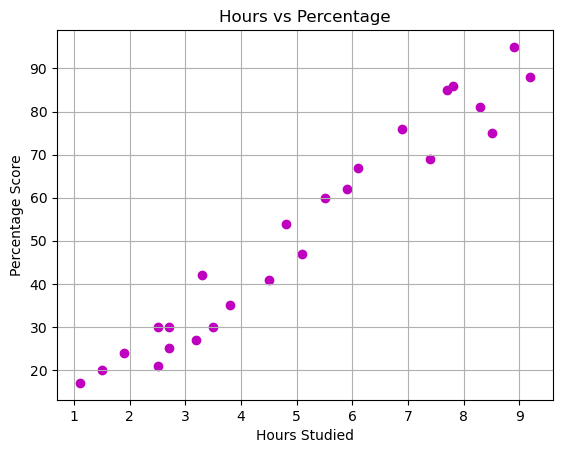

In [5]:
# Plotting the distribution of scores
plt.scatter(data['Hours'], data['Scores'] , c="m")  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

In [6]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [8]:
#Splitting the test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42) 

In [10]:
#Training the linear regression model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Linear regressor trained successfully.")

Linear regressor trained successfully.


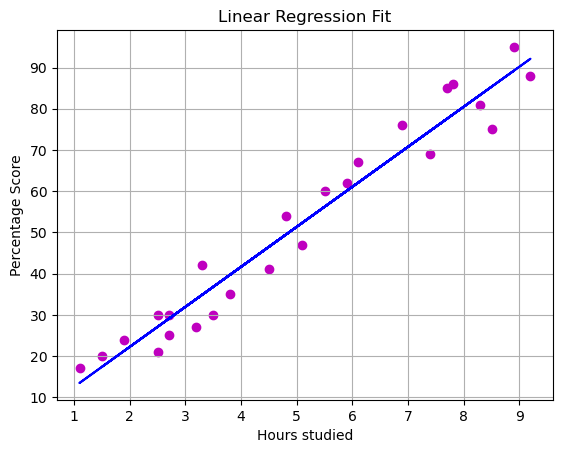

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, c="m")
plt.plot(X, line, c="b")
plt.xlabel("Hours studied")
plt.ylabel('Percentage Score')  
plt.grid()
plt.title('Linear Regression Fit')
plt.show()

In [12]:
# Making predictions on the test set
y_pred = regressor.predict(X_test)
print(X_test)
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]
 [2.7]
 [3.3]
 [5.1]]


,Actual,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


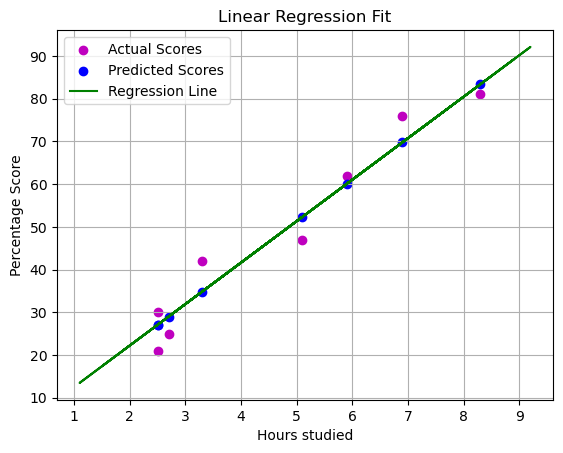

In [13]:
# Plotting the regression line
line = regressor.coef_ * X + regressor.intercept_

# Plotting for the test data
plt.scatter(X_test, y_test, c="m", label='Actual Scores')
plt.scatter(X_test, y_pred, c="b", label='Predicted Scores')
plt.plot(X, line, c="g", label='Regression Line')
plt.xlabel("Hours studied")
plt.ylabel('Percentage Score')  
plt.grid()
plt.legend()
plt.title('Linear Regression Fit')
plt.show()

In [15]:
# Evaluating the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 4.499999999999998
Mean Squared Error: 23.61945761415174
R-squared Score: 0.9487647340257012


In [20]:
#Testing with other data
hours_list = [9.25, 2, 5, 4.3 , 0.5] 
for hours in hours_list:
    own_pred = regressor.predict([[hours]])
    print("No of Hours = {:.2f}".format(hours), "| Predicted Score = {:.2f}".format(own_pred[0]))


No of Hours = 9.25 | Predicted Score = 92.62
No of Hours = 2.00 | Predicted Score = 22.22
No of Hours = 5.00 | Predicted Score = 51.35
No of Hours = 4.30 | Predicted Score = 44.55
No of Hours = 0.50 | Predicted Score = 7.65
